In [1]:
from pandas_datareader import data as pdr
import yfinance as yf
import datetime as dt
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
from fbprophet import Prophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [2]:
yf.pdr_override() 
f = pdr.get_data_yahoo("CRM",start="2010-01-01", end="2019-12-09")
print(f)
f.reset_index(level=0, inplace=True)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-01-04   18.652500   18.882500   18.547501   18.705000   18.705000   
2010-01-05   18.612499   18.750000   18.200001   18.625000   18.625000   
2010-01-06   18.687500   18.750000   18.495001   18.592501   18.592501   
2010-01-07   18.629999   18.737499   18.385000   18.510000   18.510000   
2010-01-08   18.517500   18.587500   18.315001   18.537500   18.537500   
...                ...         ...         ...         ...         ...   
2019-12-02  163.100006  163.210007  158.100006  161.000000  161.000000   
2019-12-03  156.960007  161.850006  156.190002  161.570007  161.570007   
2019-12-04  160.380005  160.690002  154.500000  156.429993  156.429993   
2019-12-05  155.740005  158.919998  155.250000  158.220001  158.220001   
2019-12-06  158.100006  159.500000  157.589

In [3]:
df= f[['Date','Adj Close']]

In [4]:
df.columns=['ds','y']

In [5]:
m = Prophet(daily_seasonality=True)
m.fit(df)

In [6]:
future = m.make_future_dataframe(periods=365)

In [7]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2860,2020-12-01,192.552743,181.543571,202.855369
2861,2020-12-02,192.599968,181.437058,203.976412
2862,2020-12-03,192.819545,182.107263,204.524499
2863,2020-12-04,192.829193,181.565657,203.155716
2864,2020-12-05,193.278002,182.887132,204.747292


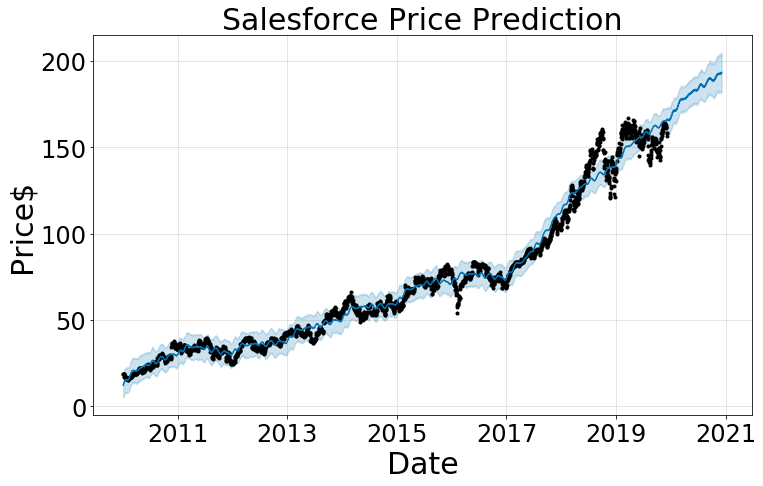

In [8]:
fig = m.plot(forecast, xlabel='Date', ylabel='Price$')
ax = fig.gca()
ax.set_title("Salesforce Price Prediction", size=30)
ax.set_xlabel("Date", size=30)
ax.set_ylabel("Price$", size=30)
ax.tick_params(axis="x", labelsize=24)
ax.tick_params(axis="y", labelsize=24)